In [1]:
# Load packages  
import numpy as np
import pandas as pd  
import seaborn as sns 
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 10)

In [2]:
data_default = pd.read_excel("../data/default of credit card clients.xls", header= 1, index_col= 0)
data_default.rename(columns={'default payment next month': 'DEFAULT' }, inplace=True)

In [3]:
data_default.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data_default.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#### Data Set Information  

`list(data_default.columns)`  

**Target Variable**  
- `DEFAULT`  
  - `1`: Yes  
  - `0`: No  
  
**Explanatory Variables**  
- `LIMIT_BAL`  
  - Amount of given credit (Numeric)
- `SEX`  
  - Gender (Binary)  
    - `1`: male  
    - `2`: female
- `EDUCATION`  
  - Level of education (Categorical)  
    - `1`: Graduate school  
    - `2`: University  
    - `3`: High School  
    - `4`: Other  
- `MARRIAGE`  
  - Marital Status (Categorical)  
    - `1`: Married  
    - `2`: Single  
    - `3`: Other     
- `AGE`  (Numeric)  

*`PAY_X` (Categorial)*
- `PAY_0`  
  - Repayment status in September
- `PAY_2`  
  - Repayment status in August  
- `PAY_3`  
  - Repayment status in July  
- `PAY_4`  
  - Repayment status in June  
- `PAY_5`  
  - Repayment status in May  
- `PAY_6`  
  - Repayment status in April  
  
  
    - `-1`: pay duly  
    - `1`: payment delayed 1 month  
    - `2`: payment delayed 2 months
    -  `...`  
    - `9`: payment delayed 9 months or more  

*`BILL_AMTX` (Numeric)*  
- `BILL_AMT1`  
  - Bill amount in September  
- `BILL_AMT2`  
  - Bill amount in August  
- `BILL_AMT3`  
  - Bill amount in July  
- `BILL_AMT4`  
  - Bill amount in June  
- `BILL_AMT5`  
  - Bill amount in May  
- `BILL_AMT6`  
  - Bill amount in April  
  
*`PAY_AMTX` (Numeric)*
- `PAY_AMT1`  
  - Amount paid in September  
- `PAY_AMT2`  
  - Amount paid in August  
- `PAY_AMT3`  
  - Amount paid in July  
- `PAY_AMT4`  
  - Amount paid in June  
- `PAY_AMT5`  
  - Amount paid in May  
- `PAY_AMT6`  
  - Amount paid in April  

### Exploratory Data Analysis  

In [5]:
default_bal = pd.DataFrame(data_default['DEFAULT'].value_counts())
default_bal['Proportion'] = default_bal['DEFAULT'] / np.sum(default_bal['DEFAULT'])
default_bal

,DEFAULT,Proportion
0,23364,0.7788
1,6636,0.2212


- Unbalanced data set, signifacntly more customers who do not default compared to those that do default (Approx 3:1)

C:\Users\Brenden Everitt\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


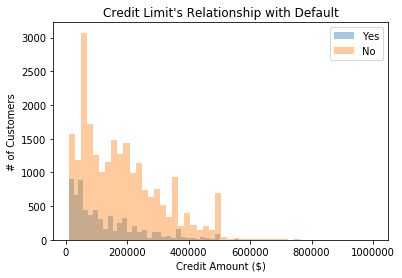

In [6]:
# LIMIT_BAL's relationship with default
sns.distplot(data_default.query('DEFAULT == 1')['LIMIT_BAL'], kde=False, label="Yes")
sns.distplot(data_default.query('DEFAULT == 0')['LIMIT_BAL'], kde=False, label="No")
plt.xlabel("Credit Amount ($)")
plt.ylabel("# of Customers")
plt.title("Credit Limit's Relationship with Default")
plt.legend()
plt.show()

- There is almost no difference between the distribution of the amount of credit between customer who default and customers who do not default  

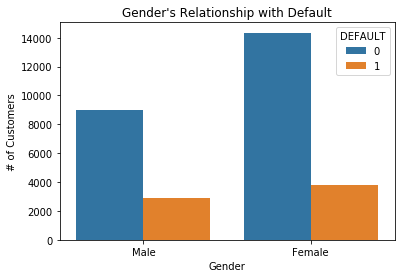

Proportion of males that default: 0.24
Proportion of females that default: 0.21


In [7]:
# SEX's relationship with default  
plot_sex = sns.countplot(x='SEX', hue='DEFAULT', data=data_default, )
plt.xlabel("Gender")
plt.ylabel("# of Customers")
plt.title("Gender's Relationship with Default")
plot_sex.set_xticklabels(["Male", "Female"])
plt.show()

print('Proportion of males that default: {}'.format(round(data_default.query('SEX == 1 and DEFAULT == 1').LIMIT_BAL.count()/ data_default.query('SEX == 1').LIMIT_BAL.count(),2)))
print('Proportion of females that default: {}'.format(round(data_default.query('SEX == 2 and DEFAULT == 1').LIMIT_BAL.count()/ data_default.query('SEX == 2').LIMIT_BAL.count(),2)))

- There is signifcantly more female's present in the dataset. Roughly the same number of females and males have defaulted, however, the proportion of males to default is higher than compared to females.  

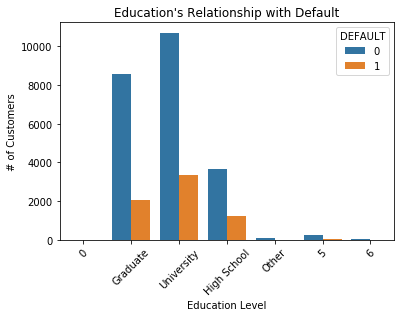

In [8]:
# Education's relationship with default  
plot_edu = sns.countplot(x='EDUCATION', hue='DEFAULT', data=data_default)
plt.xlabel("Education Level")
plt.ylabel("# of Customers")
plt.title("Education's Relationship with Default")
plot_edu.set_xticklabels(["0", "Graduate", "University", "High School", "Other", "5", "6"], rotation = 45)
plt.show()

In [9]:
data_default.groupby('EDUCATION').DEFAULT.value_counts() / data_default.groupby('EDUCATION').DEFAULT.count()

EDUCATION  DEFAULT
0          0          1.000000
1          0          0.807652
           1          0.192348
2          0          0.762651
           1          0.237349
                        ...   
4          1          0.056911
5          0          0.935714
           1          0.064286
6          0          0.843137
           1          0.156863
Name: DEFAULT, Length: 13, dtype: float64

- Some unaccounted for categorical levels present in the data. Going to add these rows to the `Other` category.  
- Differences in the proportion of people who default depending on the education category they fall into  

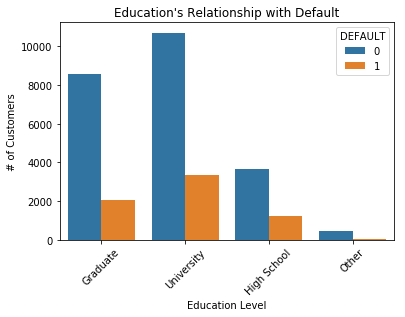

In [10]:
# Update wrong categorical columns  
data_default.loc[data_default.EDUCATION.isin([0,5,6]),'EDUCATION'] = 4
plot_edu = sns.countplot(x='EDUCATION', hue='DEFAULT', data=data_default)
plt.xlabel("Education Level")
plt.ylabel("# of Customers")
plt.title("Education's Relationship with Default")
plot_edu.set_xticklabels(["Graduate", "University", "High School", "Other"], rotation = 45)
plt.show()

In [11]:
data_default.groupby('EDUCATION').DEFAULT.value_counts() / data_default.groupby('EDUCATION').DEFAULT.count()

EDUCATION  DEFAULT
1          0          0.807652
           1          0.192348
2          0          0.762651
           1          0.237349
3          0          0.748424
           1          0.251576
4          0          0.929487
           1          0.070513
Name: DEFAULT, dtype: float64

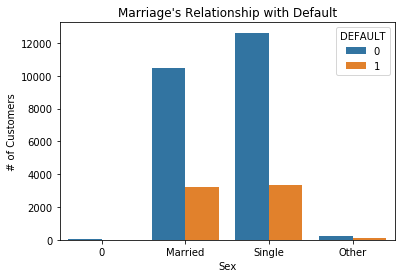

In [12]:
plot_mar = sns.countplot(x='MARRIAGE', hue='DEFAULT', data=data_default)
plt.xlabel("Sex")
plt.ylabel("# of Customers")
plt.title("Marriage's Relationship with Default")
plot_mar.set_xticklabels(['0','Married','Single', 'Other'])
plt.show()

In [13]:
data_default.groupby('MARRIAGE').DEFAULT.value_counts() / data_default.groupby('MARRIAGE').DEFAULT.count()

MARRIAGE  DEFAULT
0         0          0.907407
          1          0.092593
1         0          0.765283
          1          0.234717
2         0          0.790717
          1          0.209283
3         0          0.739938
          1          0.260062
Name: DEFAULT, dtype: float64

- Some unaccounted for categories within marriage.Goind to add them to `Other` category.    
- Differences in the proportion of people wh default depending on their relationship status  

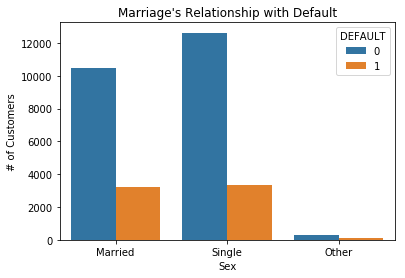

In [14]:
data_default.loc[data_default.MARRIAGE == 0, 'MARRIAGE'] = 3
plot_mar = sns.countplot(x='MARRIAGE', hue='DEFAULT', data=data_default)
plt.xlabel("Sex")
plt.ylabel("# of Customers")
plt.title("Marriage's Relationship with Default")
plot_mar.set_xticklabels(['Married','Single', 'Other'])
plt.show()

In [15]:
data_default.groupby('MARRIAGE').DEFAULT.value_counts() / data_default.groupby('MARRIAGE').DEFAULT.count()

MARRIAGE  DEFAULT
1         0          0.765283
          1          0.234717
2         0          0.790717
          1          0.209283
3         0          0.763926
          1          0.236074
Name: DEFAULT, dtype: float64

C:\Users\Brenden Everitt\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


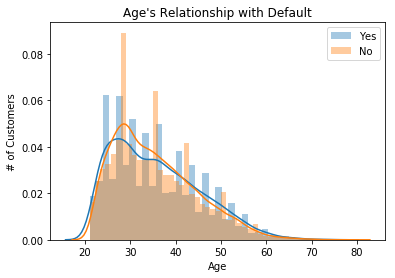

In [16]:
sns.distplot(data_default.query('DEFAULT == 1').AGE, kde=True, label="Yes")
sns.distplot(data_default.query('DEFAULT == 0').AGE, kde=True, label="No")
plt.xlabel("Age")
plt.ylabel("# of Customers")
plt.title("Age's Relationship with Default")
plt.legend()
plt.show()

- There is almost no difference between the distribution of age for customers who do default compared to customers who do not default. 

In [17]:
def CreateCategoricalComparisons(dataset, expl_vars, resp_var, rows, cols, ylabel = None):
    '''
    Function to a figure of categorical comparison plots  
    '''
    
    fig = plt.figure(figsize=(20,10))
        
    # Fill figure
    for idx, var in enumerate(expl_vars): 
        ax = fig.add_subplot(rows, cols, idx + 1)
        ax = sns.countplot(x=var, hue=resp_var, data=dataset)
        if ylabel is not None: ax.set_ylabel(ylabel)


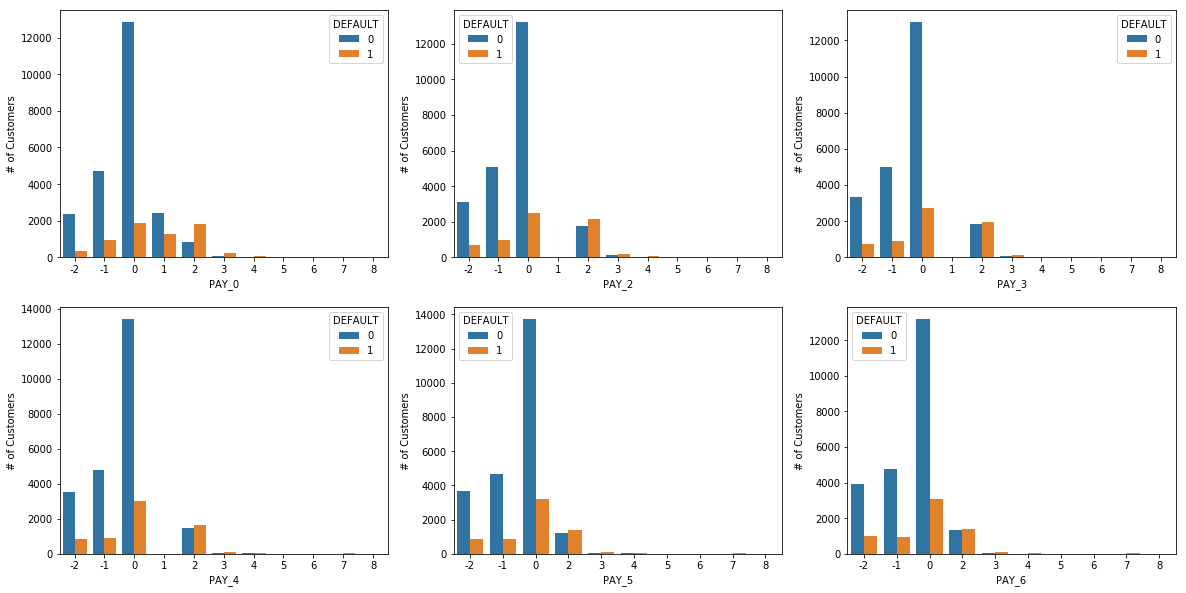

In [18]:
CreateCategoricalComparisons(data_default, ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], 'DEFAULT', 2, 3, '# of Customers')

In [19]:
data_default.PAY_0.value_counts(sort=False)

 0    14737
 1     3688
 2     2667
 3      322
 4       76
      ...  
 6       11
 7        9
 8       19
-2     2759
-1     5686
Name: PAY_0, Length: 11, dtype: int64

In [20]:
data_default.groupby('DEFAULT').PAY_0.value_counts(sort=False)

DEFAULT  PAY_0
0        -2        2394
         -1        4732
          0       12849
          1        2436
          2         823
                  ...  
1         4          52
          5          13
          6           6
          7           7
          8          11
Name: PAY_0, Length: 22, dtype: int64

- Lots of unaccount for categories, `0`, in all payment statuses. Not sure the best method to deal with this.  With customer's in categories `-2`, `-1`, and `0` they are significantly more likely to not have defaulted. Assuming `-2`, `-1`, and `0` represent customer who have not delayed a payment. Since there is not many customers from 1-9, going to look at making a binary variable about whether or not the customer has delayed a payment.  

In [31]:
data_default['DELAYED_PAY'] = np.where(data_default.loc[:, ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].isin(np.arange(1,9)).sum(axis=1) > 0, "1", "0")
# DELAYED_PAY = 1: Customer has had atleast one delayed payment between April - September
# DELAYED_PAY = 0: Customer has had no delayed payments between April - September

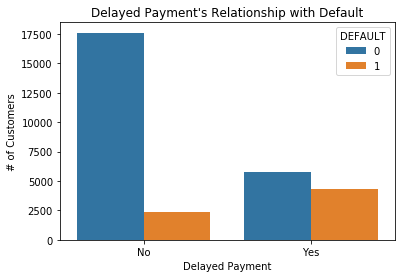

In [32]:
plot_del = sns.countplot('DELAYED_PAY', hue='DEFAULT', data=data_default)
plt.xlabel("Delayed Payment")
plt.ylabel("# of Customers")
plt.title("Delayed Payment's Relationship with Default")
plot_del.set_xticklabels(["No", "Yes"])
plt.show()

In [39]:
data_default.groupby('DELAYED_PAY').DEFAULT.value_counts() / data_default.groupby('DELAYED_PAY').DEFAULT.count()

DELAYED_PAY  DEFAULT
0            0          0.882896
             1          0.117104
1            0          0.572748
             1          0.427252
Name: DEFAULT, dtype: float64

In [41]:
def CreateNumericalComparisons(dataset, expl_vars, rows, cols):
    '''
    Function to a figure of categorical comparison plots  
    '''
    
    fig = plt.figure(figsize=(20,10))
        
    # Fill figure
    for idx, var in enumerate(expl_vars): 
        ax = fig.add_subplot(rows, cols, idx + 1)
        ax = sns.distplot(dataset.query('DEFAULT == 1').loc[:,var], kde=True, label="Yes")
        ax = sns.distplot(dataset.query('DEFAULT == 0').loc[:,var], kde=True, label="No")
        plt.legend()

C:\Users\Brenden Everitt\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


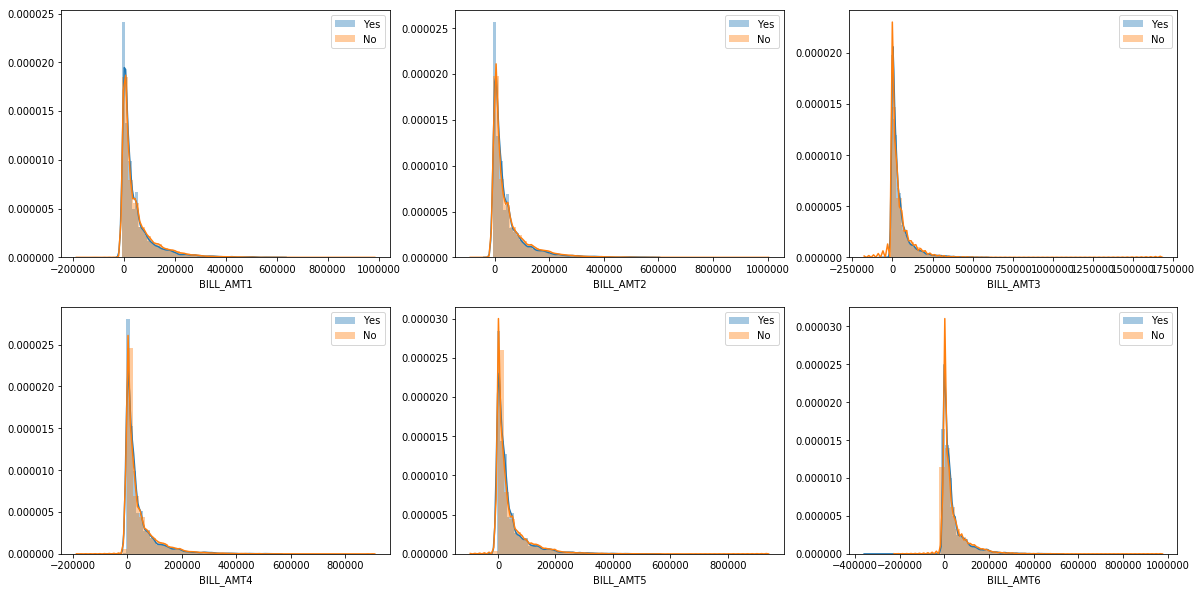

In [42]:
CreateNumericalComparisons(data_default, ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'], 2, 3)

- There is not much of a difference in the distributions of the bill amounts for customers who default compared to customers who do not default.

C:\Users\Brenden Everitt\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


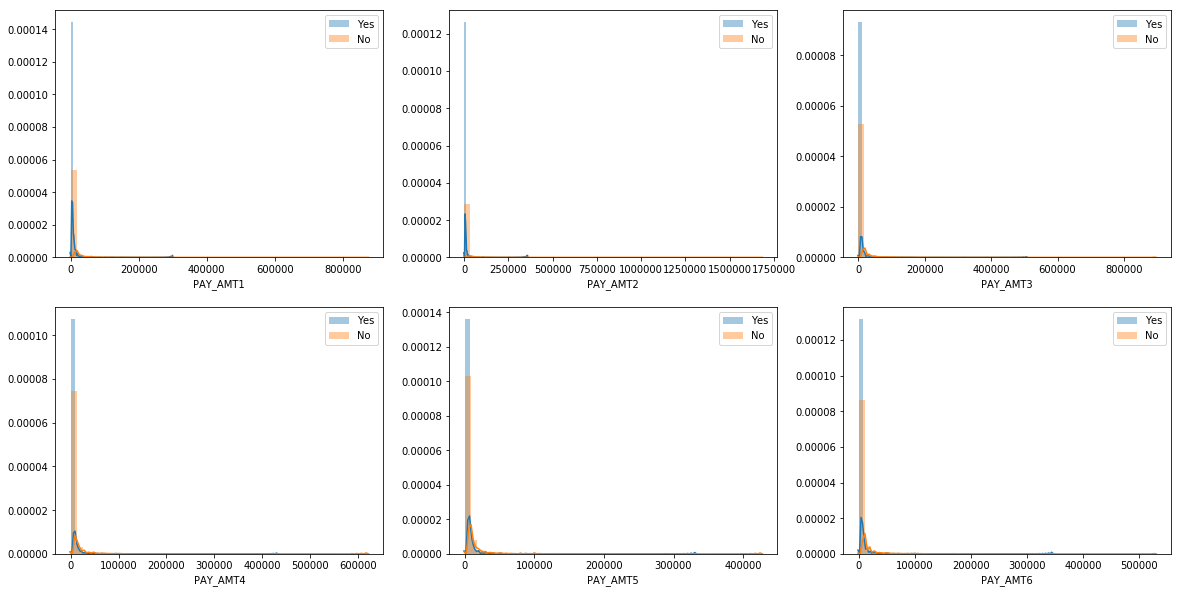

In [43]:
CreateNumericalComparisons(data_default, ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'], 2, 3)

- There is not much of a difference in the distributions for the payment amount of customers who default compared to those who do not default  

In [44]:
data_default['DIF_PAY_BILL_AMT1'] = data_default.loc[:,'PAY_AMT1'] - data_default.loc[:,'BILL_AMT1']
data_default['DIF_PAY_BILL_AMT2'] = data_default.loc[:,'PAY_AMT2'] - data_default.loc[:,'BILL_AMT2']
data_default['DIF_PAY_BILL_AMT3'] = data_default.loc[:,'PAY_AMT3'] - data_default.loc[:,'BILL_AMT3']
data_default['DIF_PAY_BILL_AMT4'] = data_default.loc[:,'PAY_AMT4'] - data_default.loc[:,'BILL_AMT4']
data_default['DIF_PAY_BILL_AMT5'] = data_default.loc[:,'PAY_AMT5'] - data_default.loc[:,'BILL_AMT5']
data_default['DIF_PAY_BILL_AMT6'] = data_default.loc[:,'PAY_AMT6'] - data_default.loc[:,'BILL_AMT6']

C:\Users\Brenden Everitt\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


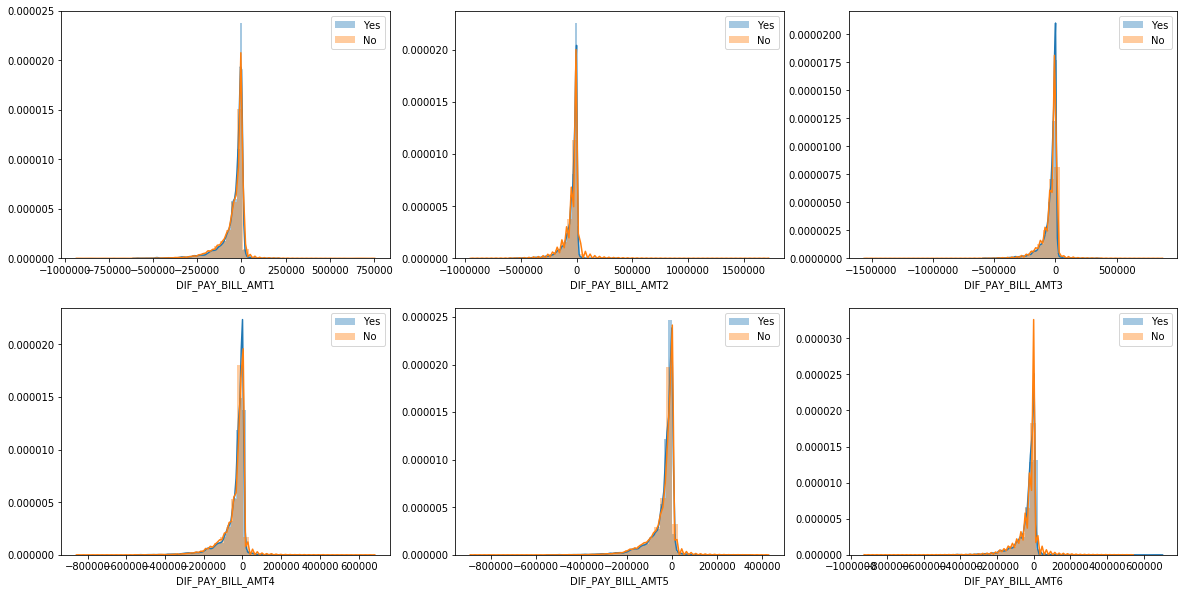

In [45]:
CreateNumericalComparisons(data_default, ['DIF_PAY_BILL_AMT1', 'DIF_PAY_BILL_AMT2', 'DIF_PAY_BILL_AMT3','DIF_PAY_BILL_AMT4','DIF_PAY_BILL_AMT5','DIF_PAY_BILL_AMT6'], 2, 3)

- Checking the difference between the amount a customer pay's and their bill amount, looking for a relationship between this and default. There does not appear to be much of a difference in the distribution of this difference value and whether or not a customer will default.  
- Appears to be if a customer makes the entire bill payment or more (`DIF_PAY_AMTX` >=0) that they will almost never default  

In [ ]:
data_default.loc[:, ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].divide(data_default.LIMIT_BAL, axis = 1)

In [73]:
np.divide(data_default[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].values, np.reshape(data_default.LIMIT_BAL.values,(-1,1)))

array([[ 0.19565   ,  0.1551    ,  0.03445   ,  0.        ,  0.        ,
         0.        ],
       [ 0.02235   ,  0.014375  ,  0.02235   ,  0.02726667,  0.02879167,
         0.027175  ],
       [ 0.32487778,  0.15585556,  0.15065556,  0.15923333,  0.16608889,
         0.17276667],
       ...,
       [ 0.11883333,  0.11186667,  0.09193333,  0.69593333,  0.68606667,
         0.64523333],
       [-0.0205625 ,  0.9797375 ,  0.9538    ,  0.659675  ,  0.1481875 ,
         0.6118    ],
       [ 0.95858   ,  0.9781    ,  0.99528   ,  0.7307    ,  0.64856   ,
         0.30626   ]])